In [76]:
#PART IA

import pandas as pd
import numpy as np

def parse_data(filename):
    A=[]
    text_file = open(filename, "r")
    lines = text_file.readlines()
    text_file.close()
    for i in range(0,len(lines)):
        id = lines[i].split(' ', 1)[0]
        string = lines[i].split(' ', 1)[1]
        rem_string = ''.join(e for e in string if e.isalnum()).lower()
        tupool = (id,rem_string)
        A.append(tupool)
    return A


In [132]:
#PART IB
import binascii

def shingle_document(string, k):
    word=string
    ShinglesHash = set()
    shingles = [word[i:i+k] for i in range(0, len(word), k)]
    for i in shingles:
        crc = binascii.crc32(str.encode(i)) & 0xffffffff
        ShinglesHash.add(crc)
    return ShinglesHash
    

In [134]:
#PART IC
def jaccard(a, b):
    
    intersectionsize=len(a.intersection(b))
    unionsize=len(a.union(b))
    JS=intersectionsize/unionsize
    return JS
    

In [174]:
#PART ID

def plagiarism(loc,k):
    DATA = parse_data(loc)
    results=[]
    SimilarityTreshold=0.8    #Defining Similarity Treshold
    for i in range(0,len(DATA)):
        for j in range(i+1,len(DATA)):
            a=shingle_document(DATA[i][1],k)
            b=shingle_document(DATA[j][1],k)
            s=jaccard(a,b)              # Calling Jaccard
            aID=DATA[i][0]
            bID=DATA[j][0]
            if s>=SimilarityTreshold:  #Defining Class
                klass='Y'
            else:
                klass='N'
            results.append((aID,bID,s,klass))

    return results

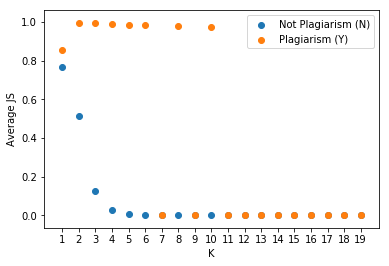

In [204]:
#PART IE
import numpy as np
from functools import reduce
import matplotlib.pyplot as plot

Location=r'C:\Users\yazdan\Desktop\MinHash-master\MinHash-master\data\articles_100.train'

AVGY=[]
AVGX=[]
for i in range(1,20):             # Defining range of K
    this_plagiarism = plagiarism(Location,i);
    summationY = 0
    summationX = 0
    NX = 0                        #Initial value for # of NOT Plagiarism
    NY = 0                        #Initial value for # of Plagiarism
    
    # Classifying items
    for item in this_plagiarism:
        if item[3]=='Y':
            NY = NY + 1
            summationY = summationY + item[2]  # Plagiarism
        else:
            NX = NX + 1
            summationX = summationX + item[2]  # NOT Plagiarism
    if NY == 0: NY = 1
    if NX == 0: NX = 1
    avgY = summationY/NY
    avgX = summationX/NX
    AVGY.append(avgY)
    AVGX.append(avgX)
    
plot.scatter(range(1,20),AVGX,label='Not Plagiarism (N)')
plot.scatter(range(1,20),AVGY, label='Plagiarism (Y)')
plot.legend()
plot.xlabel('K')
plot.ylabel('Average JS')
plot.xticks(np.arange(1, 20, step=1))
plot.show()
